In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

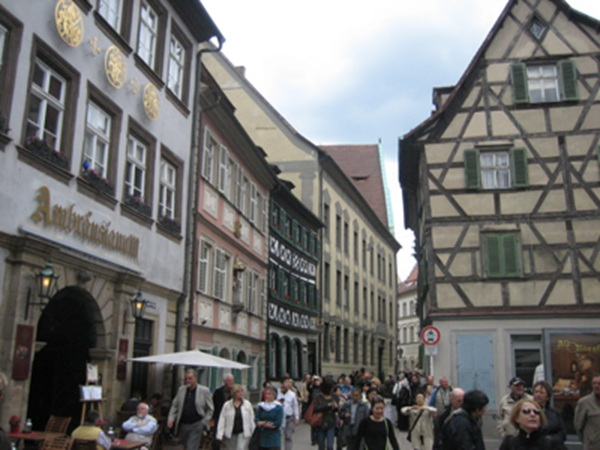

In [4]:
img = cv.imread("/content/city.jpg")
cv2_imshow(img)

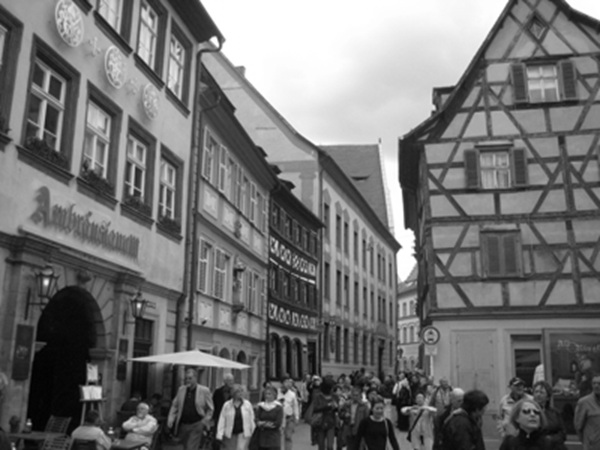

In [5]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

Roberts Edge Detection

In [6]:
#Roberts cross operator.
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )

In [7]:
from scipy import ndimage

In [8]:
img_2 = cv.imread("/content/city.jpg",0).astype('float64')
img_2/=255.0

In [9]:
#calculating the Gx,Gy.
vertical = ndimage.convolve( img_2, roberts_cross_v )
horizontal = ndimage.convolve( img_2, roberts_cross_h )

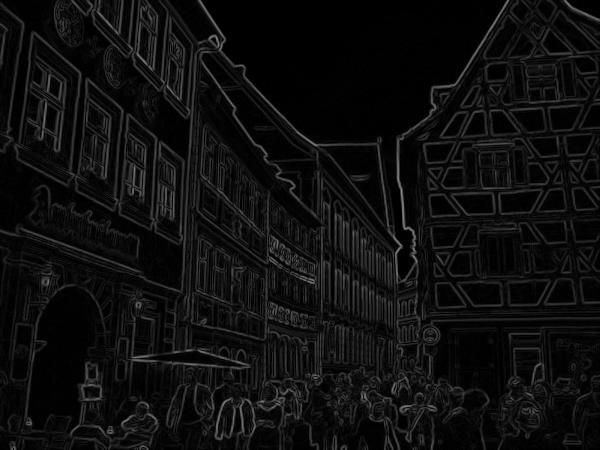

In [10]:
#calculating the G (Gradient Magnitude).
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
cv2_imshow(edged_img)
#cv.imwrite("output.jpg",edged_img)

 Prewitt Operator

In [11]:
#kernels used.
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
#horizontal and verticals changes.
img_prewittx = cv.filter2D(gray, -1, kernelx)
img_prewitty = cv.filter2D(gray, -1, kernely)

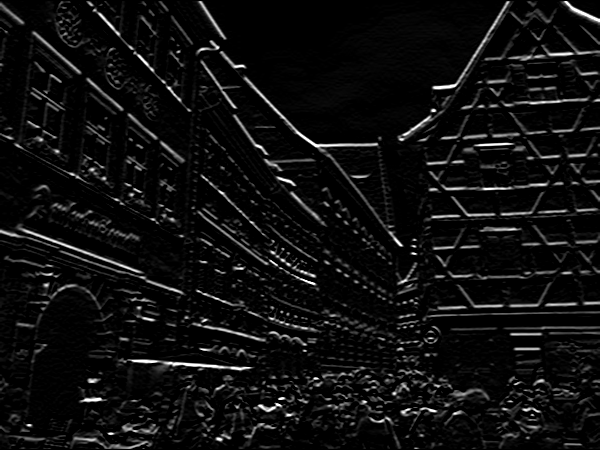

In [12]:
#the horizontal change.
cv2_imshow(img_prewittx)

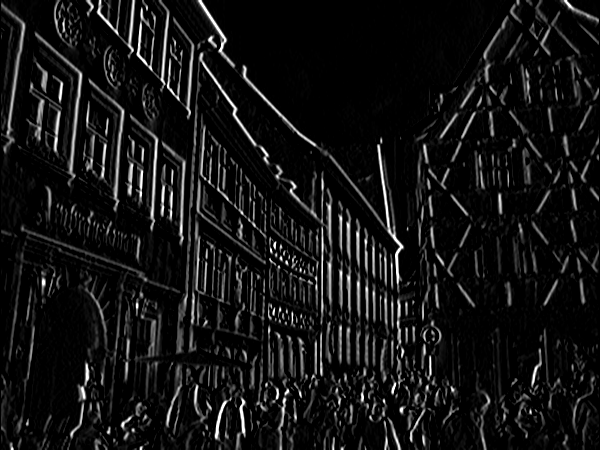

In [13]:
#vertical change.
cv2_imshow(img_prewitty)

In [14]:
#merging both horizontal and verical changes.
full_img=img_prewittx + img_prewitty

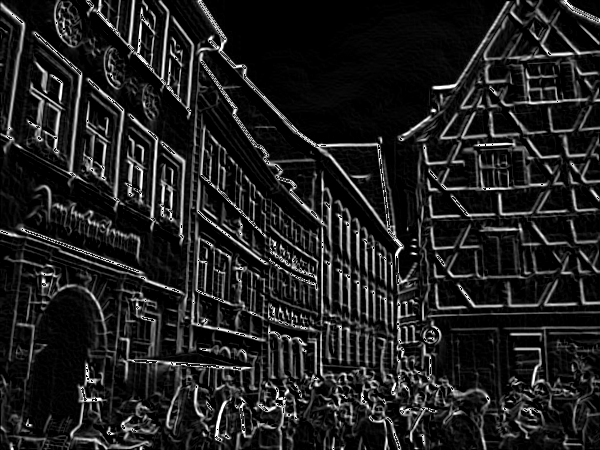

In [15]:
cv2_imshow(full_img)

Sobel 3 by 3 Edge detection

In [16]:
#kernels used for horizonal and vertical changes.
img_sobelx = cv.Sobel(gray,cv.CV_8U,1,0,ksize=3)
img_sobely = cv.Sobel(gray,cv.CV_8U,0,1,ksize=3)
#merging the two changes.
img_sobel_3 = img_sobelx + img_sobely

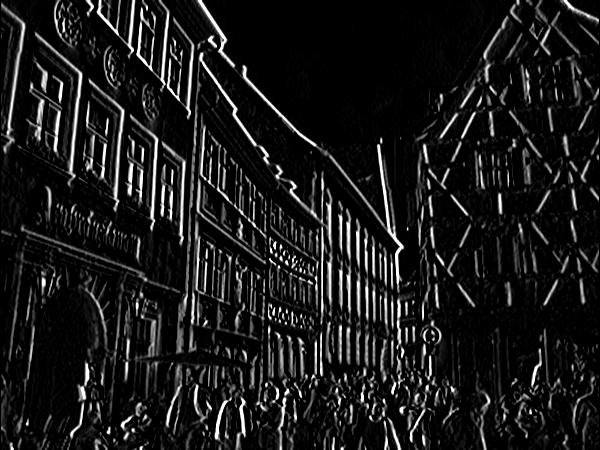

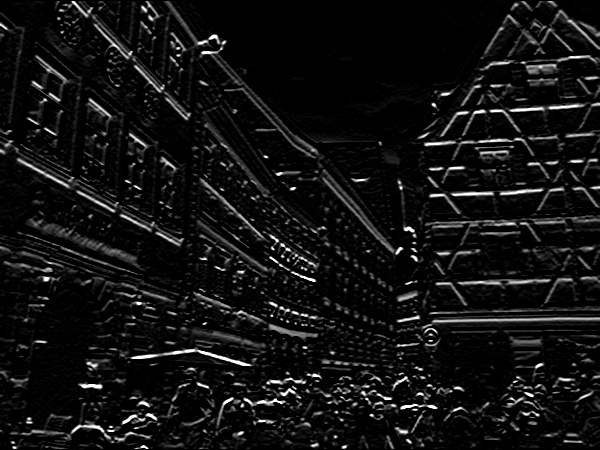

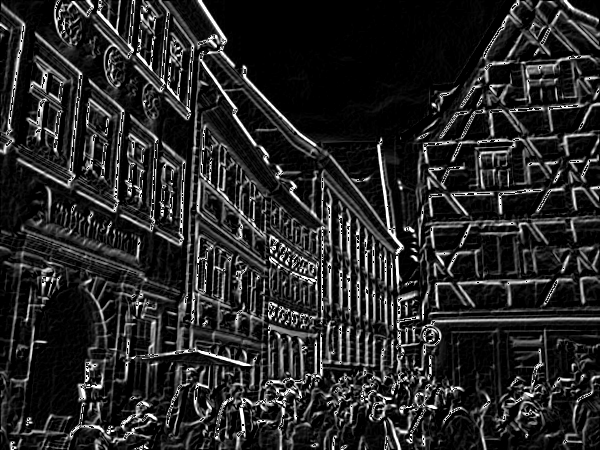

In [17]:
cv2_imshow(img_sobelx)
cv2_imshow(img_sobely)
cv2_imshow(img_sobel_3)

**Sobel 5 by 5 Edge detection**

In [18]:
#kernels used for horizonal and vertical changes.
img_sobelx = cv.Sobel(gray,cv.CV_8U,1,0,ksize=5)
img_sobely = cv.Sobel(gray,cv.CV_8U,0,1,ksize=5)
#merging the two changes.
img_sobel_5 = img_sobelx + img_sobely

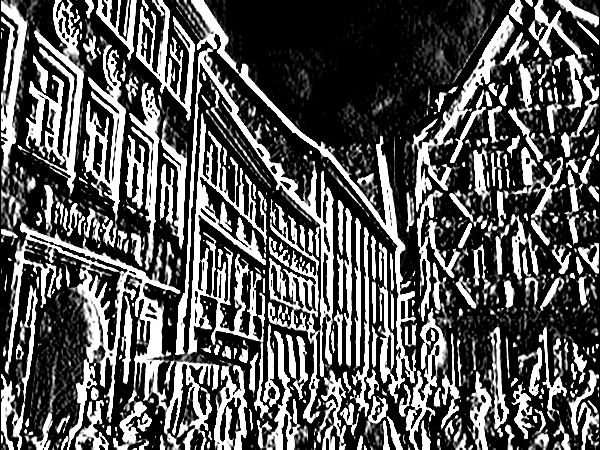

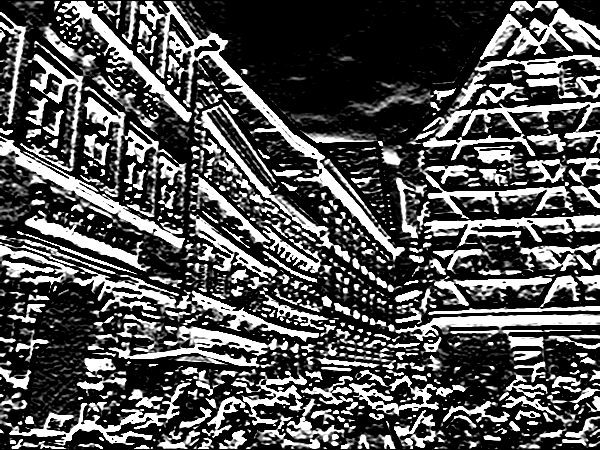

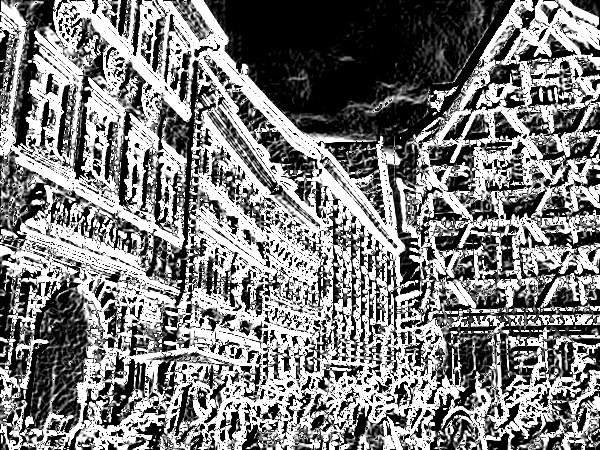

In [19]:
cv2_imshow(img_sobelx)
cv2_imshow(img_sobely)
cv2_imshow(img_sobel_5)

In [20]:
import matplotlib.pyplot as plt

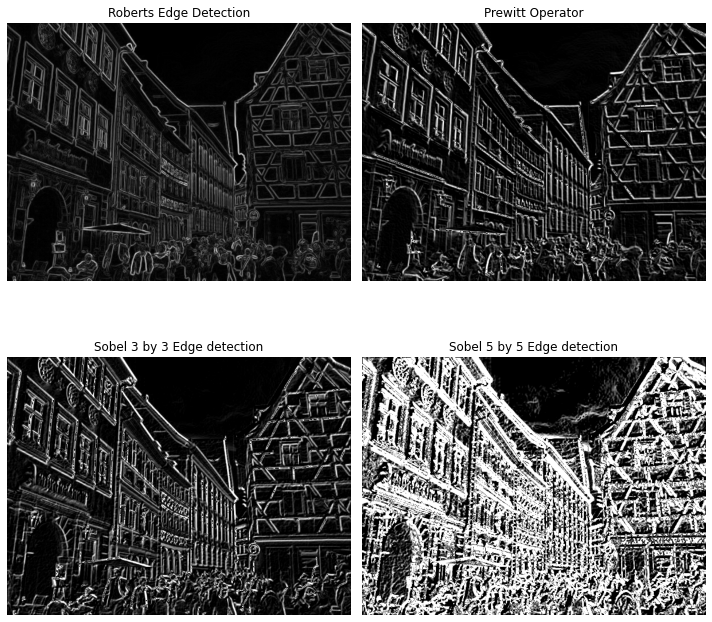

In [21]:
#fig, axs = plt.subplots(2, 2)
#axs[0, 0].imshow(edged_img,cmap='gray')
#axs[0, 0].set_title('Roberts Edge Detection')
#axs[0, 1].imshow(full_img,cmap='gray')
#axs[0, 1].set_title('Prewitt Operator')
#axs[1, 0].imshow(img_sobel_3,cmap='gray')
#axs[1, 0].set_title('Sobel 3 by 3 Edge detection')
#axs[1, 1].imshow(img_sobel_5,cmap='gray')
#axs[1, 1].set_title('Sobel 5 by 5 Edge detection')
#--------------------------------------------------------
#fig = plt.figure(figsize=(20, 7))
  
# setting values to rows and column variables
#rows = 2
#columns = 2
  
# reading images
#Image1 = edged_img
#Image2 = full_img
#Image3 = img_sobel_3
#Image4 = img_sobel_5
  
# Adds a subplot at the 1st position
#fig.add_subplot(rows, columns, 1)
  
# showing image
#plt.imshow(Image1)
#plt.axis('off')
#plt.title("First")
  
# Adds a subplot at the 2nd position
#fig.add_subplot(rows, columns, 2)
  
# showing image
#plt.imshow(Image2)
#plt.axis('off')
#plt.title("Second")
  
# Adds a subplot at the 3rd position
#fig.add_subplot(rows, columns, 3)
  
# showing image
#plt.imshow(Image3)
#plt.axis('off')
#plt.title("Third")
  
# Adds a subplot at the 4th position
#fig.add_subplot(rows, columns, 4)
  
# showing image
#plt.imshow(Image4)
#plt.axis('off')
#plt.title("Fourth")

#----------------------------------------------

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

im1 = edged_img
im2 = full_img
im3 = img_sobel_3
im4 = img_sobel_5

fig, ax = plt.subplots(nrows=2, ncols=2)

ax[0,0].axis('off')
ax[0,0].imshow(im1, cmap='gray')
ax[0,0].set_title("Roberts Edge Detection")

ax[0,1].axis('off')
ax[0,1].imshow(im2, cmap='gray')
ax[0,1].set_title("Prewitt Operator")

ax[1,0].axis('off')
ax[1,0].imshow(im3, cmap='gray')
ax[1,0].set_title("Sobel 3 by 3 Edge detection")

ax[1,1].axis('off')
ax[1,1].imshow(im4, cmap='gray')
ax[1,1].set_title("Sobel 5 by 5 Edge detection")

plt.show()

**Canny Edge Detector**

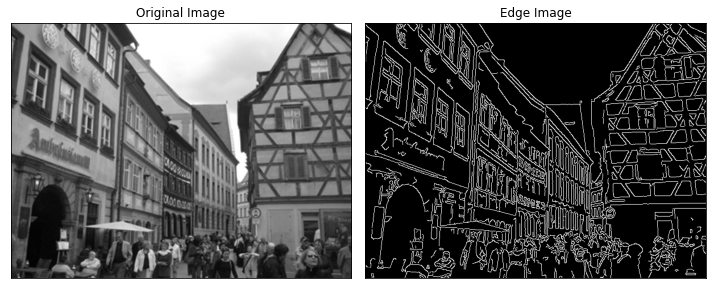

In [22]:
img_3 = cv.imread('/content/city.jpg',0)
edges = cv.Canny(img_3,100,200)
plt.subplot(121),plt.imshow(img_3,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [23]:
#---------------------------------------------------------------------------------------------------------------#

**Harris Corner Detector**

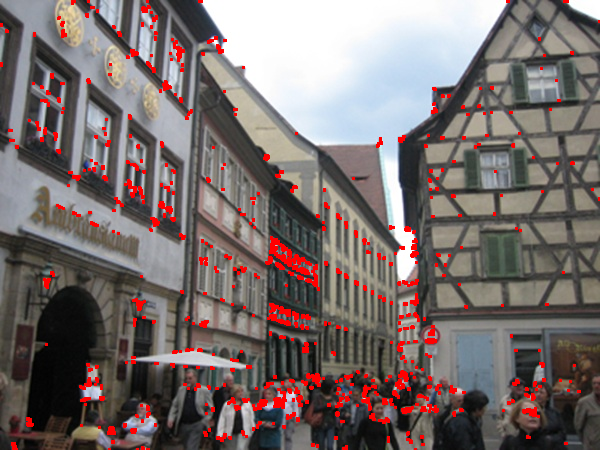

In [24]:
#ksize = 3
imgc_1 = cv.imread("/content/city.jpg")
gray = cv.cvtColor(imgc_1,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
imgc_1[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(imgc_1)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

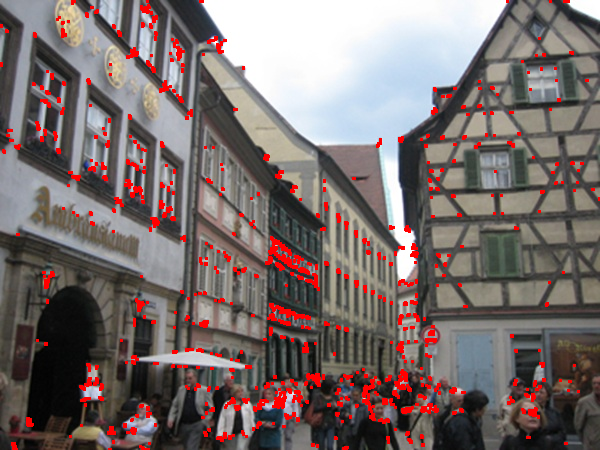

In [25]:
#ksize = 5
imgc_2 = cv.imread("/content/city.jpg")
gray = cv.cvtColor(imgc_2,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,5,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
imgc_2[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(imgc_2)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

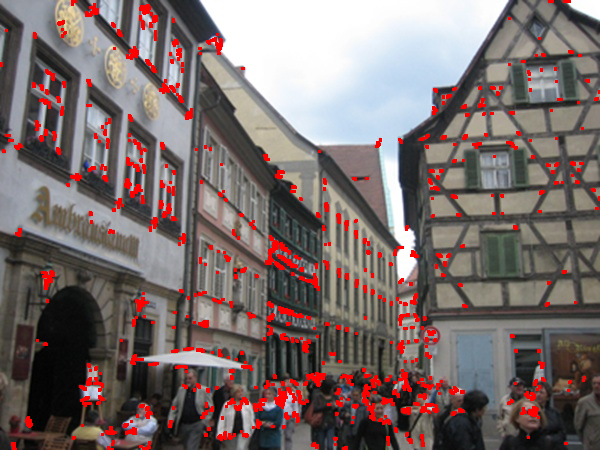

In [26]:
#ksize = 9
imgc_3 = cv.imread("/content/city.jpg")
gray = cv.cvtColor(imgc_3,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,9,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
imgc_3[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(imgc_3)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

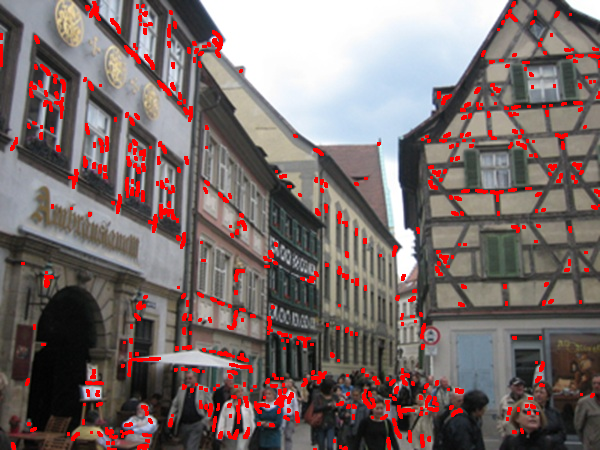

In [27]:
#ksize = 29
imgc_4 = cv.imread("/content/city.jpg")
gray = cv.cvtColor(imgc_4,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,29,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
imgc_4[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(imgc_4)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

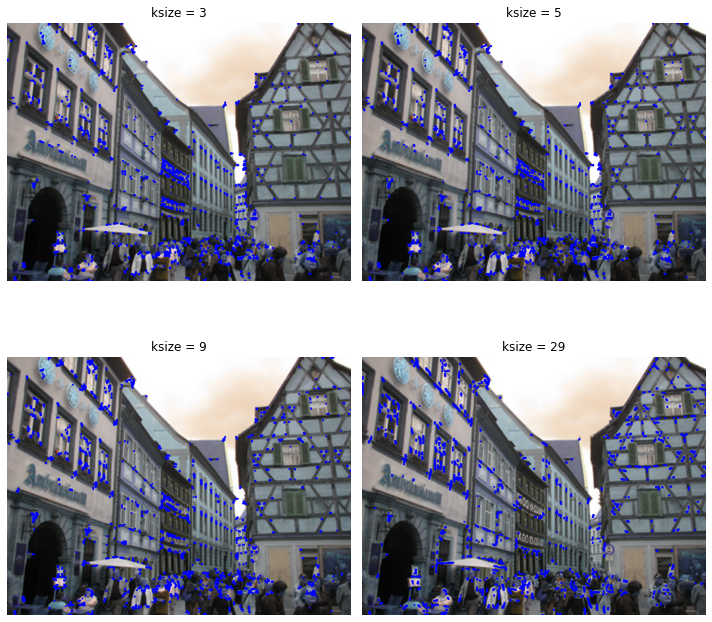

In [28]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

im1 = imgc_1
im2 = imgc_2
im3 = imgc_3
im4 = imgc_4

fig, ax = plt.subplots(nrows=2, ncols=2)

ax[0,0].axis('off')
ax[0,0].imshow(im1, cmap='gray')
ax[0,0].set_title("ksize = 3")

ax[0,1].axis('off')
ax[0,1].imshow(im2, cmap='gray')
ax[0,1].set_title("ksize = 5")

ax[1,0].axis('off')
ax[1,0].imshow(im3, cmap='gray')
ax[1,0].set_title("ksize = 9")

ax[1,1].axis('off')
ax[1,1].imshow(im4, cmap='gray')
ax[1,1].set_title("ksize = 29")

plt.show()

In [29]:
#----------------------------------------------------------------------------------------------#

In [ ]:
#saving the Edge detection images:-
cv.imwrite("Roberts Edge Detection.jpg",edged_img)
cv.imwrite("Prewitt Operator.jpg",full_img)
cv.imwrite("Sobel 3 by 3 Edge detection.jpg",img_sobel_3)
cv.imwrite("Sobel 5 by 5 Edge detection.jpg",img_sobel_5)
#---------------------------------------------------------#
cv.imwrite("Canny Edge Detector.jpg",edges)
#-------------------------------------------------------#
cv.imwrite("Harris Corner Detector - ksize = 3.jpg",imgc_1)
cv.imwrite("Harris Corner Detector - ksize = 5.jpg",imgc_2)
cv.imwrite("Harris Corner Detector - ksize = 9.jpg",imgc_3)
cv.imwrite("Harris Corner Detector - ksize = 29.jpg",imgc_4)
#-----------------------------------------------------------#